In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import *

import pandas as pd
import numpy as np
import matplotlib.dates as mdates



from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [4]:
# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [5]:
df=pd.read_csv("./CSV/금리,환율_전처리.csv",index_col='일자',encoding='euc-kr')

In [6]:
df.head()


,금리,달러환율
일자,,
2016-07-01,1.210,1152.6
2016-07-04,1.224,1147.5
2016-07-05,1.217,1148.1
2016-07-06,1.203,1153.0
2016-07-07,1.208,1165.8


In [14]:
df1=pd.read_csv("../KB금융 공매도.csv")

In [15]:
df1

,일자,공매도 수량(전체),공매도 수량(잔고수량),공매도 금액(전체),공매도 금액(잔고금액)
0,2021-03-31,2221,1089170,123894800,6.121135e+10
1,2021-03-30,5491,916982,304557200,5.034231e+10
2,2021-03-29,6744,958470,359094000,5.146984e+10
3,2021-03-26,16247,943619,864034900,5.020053e+10
4,2021-03-25,7789,954979,408951900,5.023190e+10
...,...,...,...,...,...
1162,2016-07-06,35004,793829,1118667250,2.528345e+10
1163,2016-07-05,7096,816872,231293100,2.663003e+10
1164,2016-07-04,17494,816872,571550700,2.663003e+10
1165,2016-07-01,9360,811592,307107550,2.666080e+10


In [22]:
df2=df1.drop(labels=range(0,258),axis=0)

In [23]:
df2

,일자,공매도 수량(전체),공매도 수량(잔고수량),공매도 금액(전체),공매도 금액(잔고금액)
258,2020-03-13,352613,2320623,11295418550,7.634850e+10
259,2020-03-12,192903,2180237,6500904300,7.292893e+10
260,2020-03-11,194580,2195499,6905747800,7.750111e+10
261,2020-03-10,30329,2200332,1067329750,7.734167e+10
262,2020-03-09,137419,2366823,4874297950,8.319383e+10


In [25]:
df2.set_index('일자', inplace=True)
print(df2)

            공매도 수량(전체)  공매도 수량(잔고수량)   공매도 금액(전체)  공매도 금액(잔고금액)
일자                                                             
2020-03-13      352613       2320623  11295418550  7.634850e+10
2020-03-12      192903       2180237   6500904300  7.292893e+10
2020-03-11      194580       2195499   6905747800  7.750111e+10
2020-03-10       30329       2200332   1067329750  7.734167e+10
2020-03-09      137419       2366823   4874297950  8.319383e+10
...                ...           ...          ...           ...
2016-07-06       35004        793829   1118667250  2.528345e+10
2016-07-05        7096        816872    231293100  2.663003e+10
2016-07-04       17494        816872    571550700  2.663003e+10
2016-07-01        9360        811592    307107550  2.666080e+10
2016-06-30       59732        786925   1952399200  2.565376e+10

[909 rows x 4 columns]


In [27]:
df3=pd.merge(df,df2,left_on=['일자'],right_index=True)
df3

,금리,달러환율,공매도 수량(전체),공매도 수량(잔고수량),공매도 금액(전체),공매도 금액(잔고금액)
일자,,,,,,
2016-07-01,1.210,1152.6,9360,811592,307107550,2.666080e+10
2016-07-04,1.224,1147.5,17494,816872,571550700,2.663003e+10
2016-07-05,1.217,1148.1,7096,816872,231293100,2.663003e+10
2016-07-06,1.203,1153.0,35004,793829,1118667250,2.528345e+10
2016-07-07,1.208,1165.8,7624,795149,245343850,2.560380e+10
...,...,...,...,...,...,...
2020-03-09,1.038,1191.4,137419,2366823,4874297950,8.319383e+10
2020-03-10,1.082,1201.4,30329,2200332,1067329750,7.734167e+10
2020-03-11,1.086,1196.7,194580,2195499,6905747800,7.750111e+10


In [28]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 20
plt.rcParams["figure.figsize"] = (10, 6)

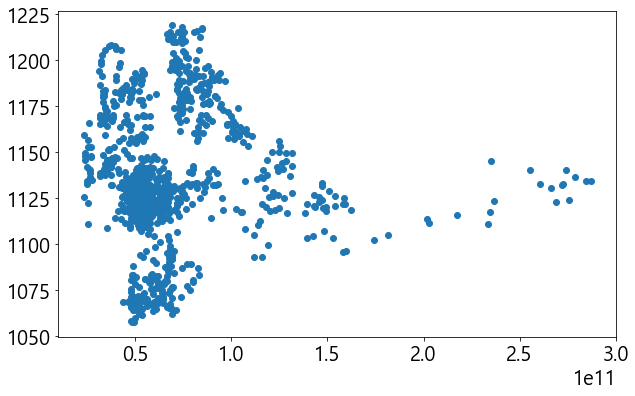

In [31]:
plt.scatter(df3['공매도 금액(잔고금액)'],df3['달러환율'])

In [33]:
pearsonr(df3['공매도 금액(잔고금액)'],df3['달러환율'])

(0.0032049822662320922, 0.9231686901172809)

In [34]:
spearmanr(df3['공매도 금액(잔고금액)'],df3['달러환율'])

SpearmanrResult(correlation=0.04052058611673505, pvalue=0.22253030971883392)

Text(0.5, 1.0, 'KB 금융 공매도 금액과 환율 상관관계')

Text(0, 0.5, '전체 거래대금(\\)')

Text(0.5, 0, 'Date')

Text(0, 0.5, '환율($->\\)')

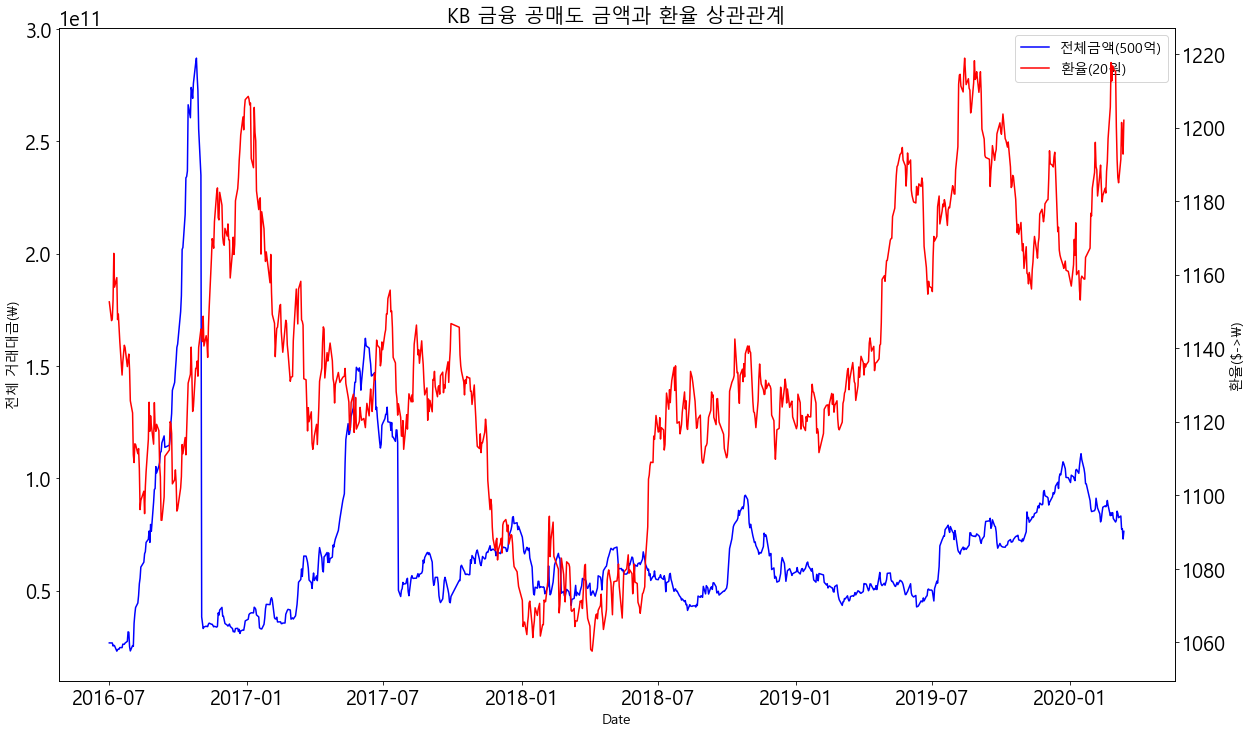

In [37]:
df3.index = pd.to_datetime(df3.index)

fig = plt.figure(figsize=(20, 12)) # 차트 생성 및 사이즈 설정
ax = fig.add_subplot(1,1,1) # subplot 생성
ax2 = ax.twinx()


line1=ax.plot(df3['공매도 금액(잔고금액)'], label='전체금액(500억)', color='b')
line2=ax2.plot(df3['달러환율'],label='환율(20원)', color='r')


ax.set_title('KB 금융 공매도 금액과 환율 상관관계', fontsize=20) # 타이틀 설정
ax.set_ylabel('전체 거래대금(\)', fontsize=14) # x축 설정
ax.set_xlabel('Date', fontsize=14) # y1축 설정
ax2.set_ylabel('환율($->\)', fontsize=14)   #y2축 설정



lines= line1 + line2
labels = [l.get_label() for l in lines]
ax.legend(lines, labels, loc='best',fontsize=14)

plt.show()